# Supervised Learning - Project

In this Project, we are going to perform a full supervised learning machine learning project on a "Diabetes" dataset. This dataset is originally from the National Institute of Diabetes and Digestive and Kidney
Diseases. The objective of the dataset is to diagnostically predict whether a patient has diabetes,
based on certain diagnostic measurements included in the dataset. 

[Kaggle Dataset](https://www.kaggle.com/datasets/akshaydattatraykhare/diabetes-dataset)

# Part I : EDA - Exploratory Data Analysis

For this task, you are required to conduct an exploratory data analysis on the diabetes dataset. You have the freedom to choose the visualizations you want to use, but your analysis should cover the following tasks mostly:

- Are there any missing values in the dataset?
- How are the predictor variables related to the outcome variable?
- What is the correlation between the predictor variables?
- What is the distribution of each predictor variable?
- Are there any outliers in the predictor variables?
- How are the predictor variables related to each other?
- Is there any interaction effect between the predictor variables?
- What is the average age of the individuals in the dataset?
- What is the average glucose level for individuals with diabetes and without diabetes?
- What is the average BMI for individuals with diabetes and without diabetes?
- How does the distribution of the predictor variables differ for individuals with diabetes and without diabetes?
- Are there any differences in the predictor variables between males and females (if gender information is available)?

In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix

In [7]:
diab = pd.read_csv('diabetes.csv')
diab.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [6]:
diab.shape

(768, 9)

In [8]:
diab.info

<bound method DataFrame.info of      Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0              6      148             72             35        0  33.6   
1              1       85             66             29        0  26.6   
2              8      183             64              0        0  23.3   
3              1       89             66             23       94  28.1   
4              0      137             40             35      168  43.1   
..           ...      ...            ...            ...      ...   ...   
763           10      101             76             48      180  32.9   
764            2      122             70             27        0  36.8   
765            5      121             72             23      112  26.2   
766            1      126             60              0        0  30.1   
767            1       93             70             31        0  30.4   

     DiabetesPedigreeFunction  Age  Outcome  
0                       0.627   5

In [9]:
diab.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [11]:
# Count the number of 0 values in each column
zero_counts = (diab == 0).sum()

# Print the counts
print(zero_counts)

Pregnancies                 111
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                     500
dtype: int64


In [16]:
# Many zero values that cannot be real. Glucose, BP, SkinThickness, Insulin, BMI, Age all cannot be zero in actuality.
# Insulin is a critical variable in a dataset where diabetes status is the outcome variable.
# Thus 374/768 (48.7%) NaN/0 values are a serious obstacle in gleaning meaningful results from this data as is. 
# 36.9% of the group with missing Insulin values are, in fact, diabetic.
diab[diab['Insulin'] == 0].describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,374.000000,374.000000,374.000000,374.000000,374.0,374.000000,374.000000,374.000000,374.000000
mean,4.433155,119.409091,67.473262,11.508021,0.0,30.943316,0.415340,35.796791,0.368984
std,3.437621,32.544233,24.522312,15.738605,0.0,8.419854,0.300547,12.729034,0.483176
min,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.250000,64.000000,0.000000,0.0,26.500000,0.209000,25.000000,0.000000
50%,4.000000,115.000000,72.000000,0.000000,0.0,31.200000,0.302500,32.000000,0.000000
75%,7.000000,138.000000,80.000000,26.750000,0.0,35.675000,0.553250,43.000000,1.000000
max,14.000000,199.000000,122.000000,99.000000,0.0,52.900000,1.893000,72.000000,1.000000


In [17]:
# Those rows with a meaningful Insulin value
diab[diab['Insulin'] != 0].describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,394.000000,394.000000,394.000000,394.000000,394.000000,394.000000,394.000000,394.000000,394.000000
mean,3.286802,122.304569,70.654822,29.106599,155.548223,32.988579,0.525543,30.814721,0.329949
std,3.209635,31.396725,12.469919,10.504273,118.775855,7.210160,0.350127,10.198971,0.470792
min,0.000000,0.000000,24.000000,7.000000,14.000000,0.000000,0.085000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,21.000000,76.250000,28.325000,0.270250,23.000000,0.000000
50%,2.000000,119.000000,70.000000,29.000000,125.000000,33.200000,0.449500,27.000000,0.000000
75%,5.000000,143.000000,78.000000,36.750000,190.000000,37.075000,0.687000,36.000000,1.000000
max,17.000000,198.000000,110.000000,63.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [20]:
# Make a new df of Insulin == 0 only to see if it's generally bad with missing values
zeroInsulin = diab[diab['Insulin'] == 0]
# Count the number of 0 values in each column
zeroInsulin_counts = (zeroInsulin == 0).sum()

# Print the counts
print(zeroInsulin_counts)

Pregnancies                  54
Glucose                       4
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          10
DiabetesPedigreeFunction      0
Age                           0
Outcome                     236
dtype: int64


In [22]:
# Now compare to dataframe of only Insulin > 0 rows
realInsulin = diab[diab['Insulin'] > 0]
# Count the number of 0 values in each column
realInsulin_counts = (realInsulin == 0).sum()

# Print the counts
print(realInsulin_counts)

Pregnancies                  57
Glucose                       1
BloodPressure                 0
SkinThickness                 0
Insulin                       0
BMI                           1
DiabetesPedigreeFunction      0
Age                           0
Outcome                     264
dtype: int64


In [26]:
realInsulin = realInsulin[(realInsulin['Glucose'] != 0) & (realInsulin['BMI'] != 0)]
# Count the number of 0 values in each amended column
realInsulin_counts = (realInsulin == 0).sum()
print(realInsulin_counts)

Pregnancies                  56
Glucose                       0
BloodPressure                 0
SkinThickness                 0
Insulin                       0
BMI                           0
DiabetesPedigreeFunction      0
Age                           0
Outcome                     262
dtype: int64


In [10]:
null_counts = diab.isnull().sum()
print(null_counts)

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64


In [23]:
realInsulin.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,394.000000,394.000000,394.000000,394.000000,394.000000,394.000000,394.000000,394.000000,394.000000
mean,3.286802,122.304569,70.654822,29.106599,155.548223,32.988579,0.525543,30.814721,0.329949
std,3.209635,31.396725,12.469919,10.504273,118.775855,7.210160,0.350127,10.198971,0.470792
min,0.000000,0.000000,24.000000,7.000000,14.000000,0.000000,0.085000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,21.000000,76.250000,28.325000,0.270250,23.000000,0.000000
50%,2.000000,119.000000,70.000000,29.000000,125.000000,33.200000,0.449500,27.000000,0.000000
75%,5.000000,143.000000,78.000000,36.750000,190.000000,37.075000,0.687000,36.000000,1.000000
max,17.000000,198.000000,110.000000,63.000000,846.000000,67.100000,2.420000,81.000000,1.000000


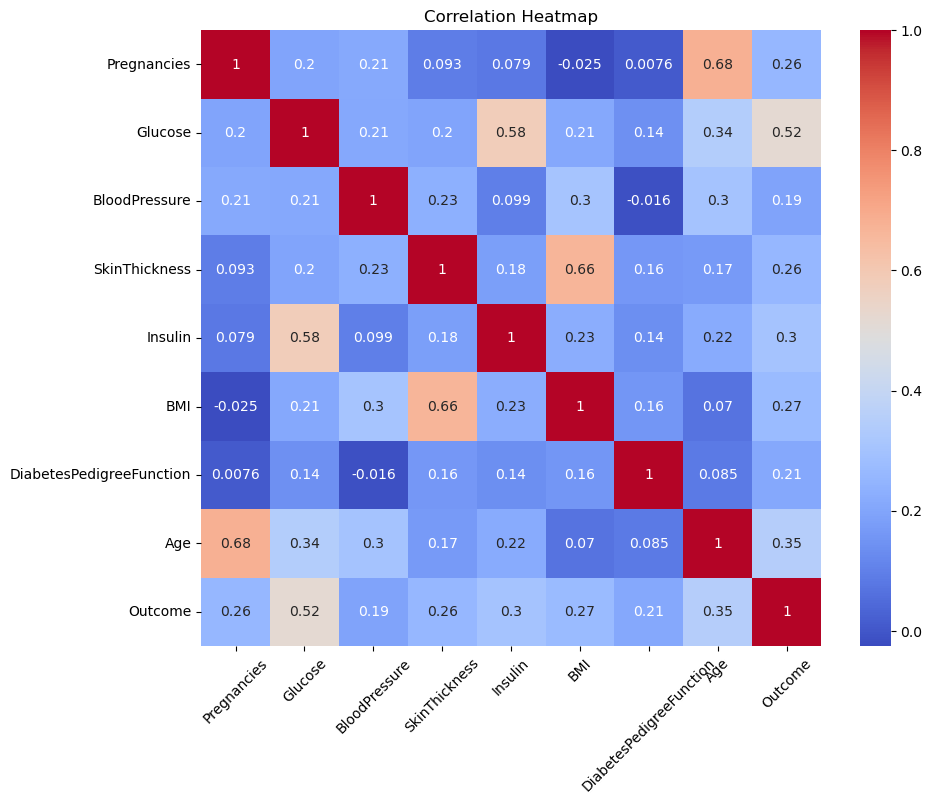

In [71]:
# Generate the correlation matrix
correlation_matrix = realInsulin.corr()

# print(correlation_matrix)

import seaborn as sns
import matplotlib.pyplot as plt
# Create the correlation heatmap using seaborn
plt.figure(figsize=(10, 8))  # Set the size of the heatmap
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')

# Customize the plot
plt.title('Correlation Heatmap')
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.show()

# Part II : Preprocessing & Feature Engineering

You need to perform preprocessing on the given dataset. Please consider the following tasks and carry out the necessary steps accordingly.
- Handling missing values
- Handling outliers
- Scaling and normalization
- Feature Engineering
- Handling imbalanced data

In [29]:
realInsulin.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000
mean,3.301020,122.627551,70.663265,29.145408,156.056122,33.086224,0.523046,30.864796,0.331633
std,3.211424,30.860781,12.496092,10.516424,118.841690,7.027659,0.345488,10.200777,0.471401
min,0.000000,56.000000,24.000000,7.000000,14.000000,18.200000,0.085000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,21.000000,76.750000,28.400000,0.269750,23.000000,0.000000
50%,2.000000,119.000000,70.000000,29.000000,125.500000,33.200000,0.449500,27.000000,0.000000
75%,5.000000,143.000000,78.000000,37.000000,190.000000,37.100000,0.687000,36.000000,1.000000
max,17.000000,198.000000,110.000000,63.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [38]:
# Looking for Outliers
top_10BMI = realInsulin['BMI'].nlargest(10)
top_10Insulin = realInsulin['Insulin'].nlargest(10)
top_10DPF = realInsulin['DiabetesPedigreeFunction'].nlargest(10)

print(top_10DPF)

445    2.420
228    2.329
4      2.288
370    2.137
593    1.699
395    1.600
147    1.400
308    1.391
39     1.390
259    1.353
Name: DiabetesPedigreeFunction, dtype: float64


In [31]:
import pandas as pd

# Calculate the IQR and identify outliers
Q1 = realInsulin.quantile(0.25)
Q3 = realInsulin.quantile(0.75)
IQR = Q3 - Q1

# Identify outliers
outliers = ((realInsulin < (Q1 - 1.5 * IQR)) | (realInsulin > (Q3 + 1.5 * IQR)))


In [36]:
# Finding outliers in each column. 
# But outliers can be of interest here, as their extreme values in some features might be important in predicting their row's Outcome value.
outliers.describe()
outliers_count = outliers.sum(axis=0)
outliers_count


Pregnancies                 11
Glucose                      0
BloodPressure                7
SkinThickness                1
Insulin                     25
BMI                          6
DiabetesPedigreeFunction    12
Age                         13
Outcome                      0
dtype: int64

In [40]:
X = realInsulin.drop('Outcome', axis=1)
y = realInsulin['Outcome']
zX = zeroInsulin.drop('Outcome', axis=1)
zy = zeroInsulin['Outcome']


In [41]:
# Scaling and Normalizing
# Scaling for (non-ensemble) SVC method and Logistic Regression
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaled_RI = scaler.fit_transform(realInsulin)
scaled_X = scaler.fit_transform(X)
scaled_ZI = scaler.fit_transform(zeroInsulin)
scaled_zX = scaler.fit_transform(zX)

# from sklearn.preprocessing import MinMaxScaler

# MMscaler = MinMaxScaler()
# normalized_RI = scaler.fit_transform(realInsulin)
# normalized_ZI = scaler.fit_transform(zeroInsulin)



In [68]:
# Export df files to see in Tableau
realInsulin.to_csv(r'C:\Career\LighthouseLabs\DataScience_Week9\Supervised_Learning_Project\realInsulin.csv', index=False)
zeroInsulin.to_csv(r'C:\Career\LighthouseLabs\DataScience_Week9\Supervised_Learning_Project\zeroInsulin.csv', index=False)

# Tableau graphs: https://public.tableau.com/app/profile/aj.hammond/viz/DiabetesSupervisedLearningModel/InsulinxGlucose?publish=yes

# Part III : Training ML Model

For this task, you are required to build a machine learning model to predict the outcome variable. This will be a binary classification task, as the target variable is binary. You should select at least two models, one of which should be an ensemble model, and compare their performance.

- Train the models: Train the selected models on the training set.
- Model evaluation: Evaluate the trained models on the testing set using appropriate evaluation metrics, such as accuracy, precision, recall, F1-score, and ROC-AUC.
- Model comparison: Compare the performance of the selected models and choose the best-performing model based on the evaluation metrics. You can also perform additional analysis, such as model tuning and cross-validation, to improve the model's performance.

In [42]:
# Import train_test_split function
from sklearn.model_selection import train_test_split

# Split dataset into 70% training set and 30% test set
X_train, X_test, y_train, y_test = train_test_split(scaled_X, y, test_size=0.3,random_state=109)


In [43]:
# Ensemble Method: Random Forest
from sklearn.ensemble import RandomForestClassifier

# Create an instance of the Random Forest classifier
rf_classifier = RandomForestClassifier(n_estimators=100)

# Fit the model to your training data
rf_classifier.fit(X_train, y_train)

# Make predictions on new data
y_pred = rf_classifier.predict(X_test)


In [44]:
# Random Forest Confusion Matrix
from sklearn.metrics import confusion_matrix
cm_RF = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm_RF)

Confusion Matrix:
[[71  7]
 [14 26]]


In [45]:
# Random Forest evaluation metrics
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics

# Model Accuracy: how often is the classifier correct?
print("RF Accuracy:",metrics.accuracy_score(y_test, y_pred))

# Model Precision: what percentage of positive tuples are labeled as such?
print("RF Precision:",metrics.precision_score(y_test, y_pred))

# Model Recall: what percentage of positive tuples are labelled as such?
print("RF Recall:",metrics.recall_score(y_test, y_pred))


RF Accuracy: 0.8220338983050848
RF Precision: 0.7878787878787878
RF Recall: 0.65


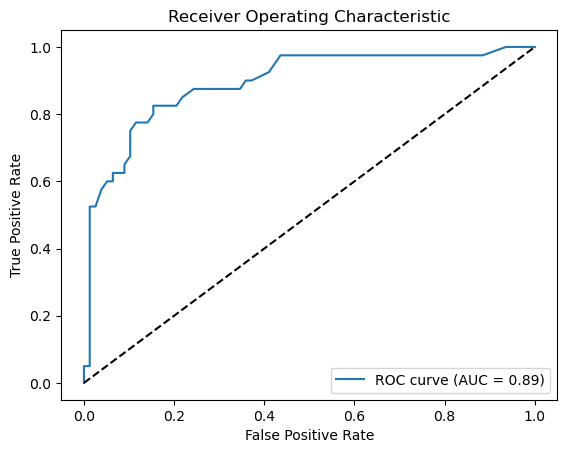

In [61]:
# Random Forest ROC curve

# Get the predicted probabilities for the positive class
y_pred_proba_rf = rf_classifier.predict_proba(X_test)[:, 1]

# Calculate the FPR, TPR, and thresholds for the ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba_rf)

# Calculate the AUC (Area Under the Curve) score
auc_score = roc_auc_score(y_test, y_pred_proba_rf)

# Plot the ROC curve
plt.plot(fpr, tpr, label=f'ROC curve (AUC = {auc_score:.2f})')
plt.plot([0, 1], [0, 1], 'k--')  # Diagonal line for random classifier
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend()
plt.show()


In [64]:
# SVC RBF
#Import svm model
from sklearn import svm

#Create a svm Classifier
from sklearn.svm import SVC
svcrbf = SVC(kernel='rbf', probability=True)

#Train the model using the training sets
svcrbf.fit(X_train, y_train)

#Predict the response for test dataset
rbfy_pred = svcrbf.predict(X_test)


In [50]:
# SVM RBF Confusion Matrix
cm_RBF = confusion_matrix(y_test, rbfy_pred)
print("RBF Confusion Matrix:")
print(cm_RBF)

RBF Confusion Matrix:
[[70  8]
 [18 22]]


In [49]:
# SVM RBF evaluation metrics

# Model Accuracy: how often is the classifier correct?
print("RF Accuracy:",metrics.accuracy_score(y_test, rbfy_pred))

# Model Precision: what percentage of positive tuples are labeled as such?
print("RF Precision:",metrics.precision_score(y_test, rbfy_pred))

# Model Recall: what percentage of positive tuples are labelled as such?
print("RF Recall:",metrics.recall_score(y_test, rbfy_pred))

RF Accuracy: 0.7796610169491526
RF Precision: 0.7333333333333333
RF Recall: 0.55


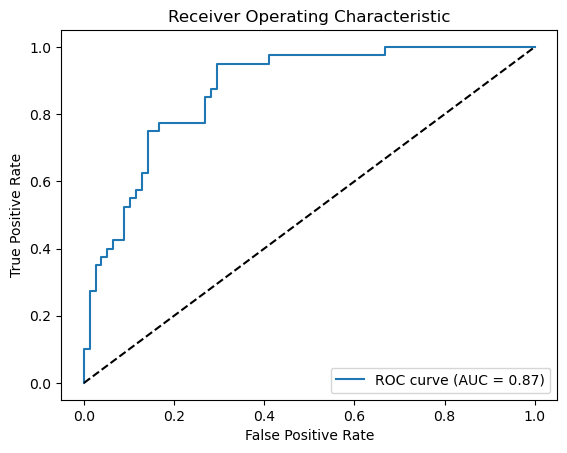

In [65]:
# RBF SVM ROC curve
# Get the predicted probabilities for the positive class
y_pred_proba_rbf = svcrbf.predict_proba(X_test)[:, 1]

# Calculate the FPR, TPR, and thresholds for the ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba_rbf)

# Calculate the AUC (Area Under the Curve) score
auc_score = roc_auc_score(y_test, y_pred_proba_rbf)

# Plot the ROC curve
plt.plot(fpr, tpr, label=f'ROC curve (AUC = {auc_score:.2f})')
plt.plot([0, 1], [0, 1], 'k--')  # Diagonal line for random classifier
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend()
plt.show()


In [75]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import log_loss, roc_auc_score, recall_score, precision_score, average_precision_score, f1_score, classification_report

clf = LogisticRegression(penalty='none') # logistic regression with no penalty term in the cost function.

clf.fit(X_train, y_train)

c:\Users\User\anaconda3\envs\thisone\lib\site-packages\sklearn\linear_model\_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(


LogisticRegression(penalty='none')

In [76]:
# Log Reg Confusion Matrix
# Get the predicted probabilities for the positive class
# Make predictions on the test set
y_pred = clf.predict(X_test)

# Generate the confusion matrix
cm_clf = confusion_matrix(y_test, y_pred)

print("Log Reg Confusion Matrix:")
print(cm_clf)

Log Reg Confusion Matrix:
[[71  7]
 [14 26]]


In [77]:
# Logistic Regression evaluation metrics

# Model Accuracy: how often is the classifier correct?
print("LR Accuracy:",metrics.accuracy_score(y_test, y_pred))

# Model Precision: what percentage of positive tuples are labeled as such?
print("LR Precision:",metrics.precision_score(y_test, y_pred))

# Model Recall: what percentage of positive tuples are labelled as such?
print("LR Recall:",metrics.recall_score(y_test, y_pred))
### These numbers match the RF ones, so I believe they are incorrect and are using the RF predictions.

LR Accuracy: 0.8220338983050848
LR Precision: 0.7878787878787878
LR Recall: 0.65


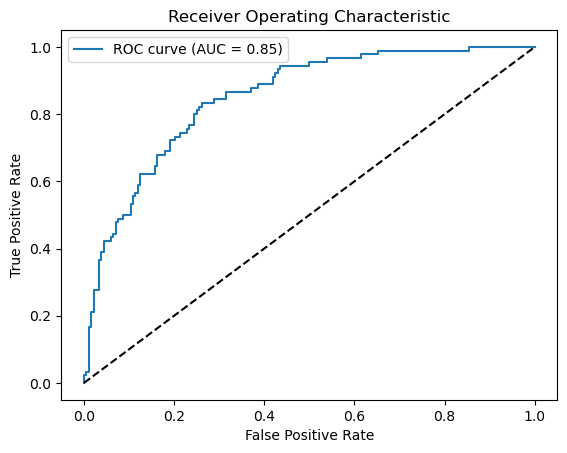

In [57]:
# Logistic Regression ROC curve
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, roc_auc_score

# Get the predicted probabilities for the positive class
y_pred_proba_clf = clf.predict_proba(X_train)[:, 1]

# Calculate the FPR, TPR, and thresholds for the ROC curve
fpr, tpr, thresholds = roc_curve(y_train, y_pred_proba_clf)

# Calculate the AUC (Area Under the Curve) score
auc_score = roc_auc_score(y_train, y_pred_proba_clf)

# Plot the ROC curve
plt.plot(fpr, tpr, label=f'ROC curve (AUC = {auc_score:.2f})')
plt.plot([0, 1], [0, 1], 'k--')  # Diagonal line for random classifier
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend()
plt.show()


# Part IV : Conclusion

From the machine learning models developed and the exploratory data analysis (EDA) conducted, generate four bullet points as your findings.

In [ ]:
1) This dataset had many missing values that were rendered as zeros. These zeros distorted every descriptive statistic and would have affected any attempt at machine learning. There was also a very strong tendency for a false, impossible zero (no has zero for a blood-pressure reading, for example) in one column to be accompanied by false zeros in other columns, too. Generally, roughly 48% of the rows were missing multiple values. These missing values were of particular concern for the Insulin column as it is a value considered medically important in evaluating whether someone is diabetic or not, the outcome variable here.

2) The correlation heat map revealed no decisively strong relationships, and the graphs of the features with the highest correlations (Insulin with Glucose and BMI with Skin Thickness)

3) The ensemble method used here, Random Forest, resulted in the best evaluation metrics, from Accuracy to Precision to the ROC curve. Its multiple, parallel training does appear to have delivered a better model for making predictions about new data.

1) This dataset had many missing values that were rendered as zeros. These zeros distorted every descriptive statistic and would have affected any attempt at machine learning. There was also a very strong tendency for a false, impossible zero (no has zero for a blood-pressure reading, for example) in one column to be accompanied by false zeros in other columns, too. Generally, roughly 48% of the rows were missing multiple values. These missing values were of particular concern for the Insulin column as it is a value considered medically important in evaluating whether someone is diabetic or not, the outcome variable here.

2) The correlation heat map revealed no decisively strong relationships, and the graphs of the features with the highest correlations (Insulin with Glucose and BMI with Skin Thickness) filtered on Outcome status showed a great deal of overlap in those who are and are not diabetic. In the case of Glucose and Insulin, measures that are used as diagnostic criteria for diabetes, it is possible that repeated measures might be needed to better discriminate Outcome status.
https://public.tableau.com/app/profile/aj.hammond/viz/DiabetesSupervisedLearningModel/InsulinxGlucose?publish=yes

3) The ensemble method used here, Random Forest, resulted in the best evaluation metrics, from Accuracy (0.822) to Precision (0.788) to the ROC curve (0.89). Its multiple, parallel training does appear to have delivered a better model for making predictions about new data.

4) The number of False Negatives from each method is arguably the single most important metric as a matter of clinical concern, as individuals who are truly diabetic but rated as not diabetic are the group most likely to suffer from the misclassification. The Random Forest performed best here, too.
Future analysis would like to take this training and see how the rows with multiple missing values fare in predictions, as 36.9% of those rows are diabetic in the Outcome column. It would be interesting to see how well the model predicts this status with decidedly less information available.